# Fashion MNIST Dataset
Allison R Deming
IST 718 Lab 3
11/18/2023
Dr. Lando

The Fashion-MNIST dataset is made up of images from fashion chain Zalando. It contains a training set of 60,000 images and a test set of 10,000 images. Each image is a 28 x 28 grayscale image associated with the label from 10 categories. Those labels are from 0-9 and those labels are associated with T-Shirt/Top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, sports Shoe, Bag, and Ankle Boot.

# KERAS Neural Network Algorithm

In [ ]:
#Importing all libraries
import numpy as np
import matplotlib.pylab as plt
import random

import tensorflow as tf 
from tensorflow.keras import datasets, layers, models

import sklearn
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix



In [ ]:
#Using keras to download the fashion mnist data
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
#Checking the type of array the training images are
type(train_images)

numpy.ndarray

In [ ]:
#Checking the shape of the training and testin
train_images.shape

In [ ]:
x_train = train_images.shape

In [ ]:
x_test = test_images.shape

# Classification Algorithm Using Keras

In [ ]:
#Categorizing the Labels based on the Fashion Label.
category_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
               'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
#Getting a random range of the label
train_image_set = list(range(len(train_labels)))
sample_images = random.sample(train_image_set, 16)
sample_images

[8371,
 33977,
 4439,
 36419,
 5497,
 23281,
 24354,
 26412,
 46451,
 15289,
 5253,
 55597,
 4869,
 36614,
 24494,
 55226]

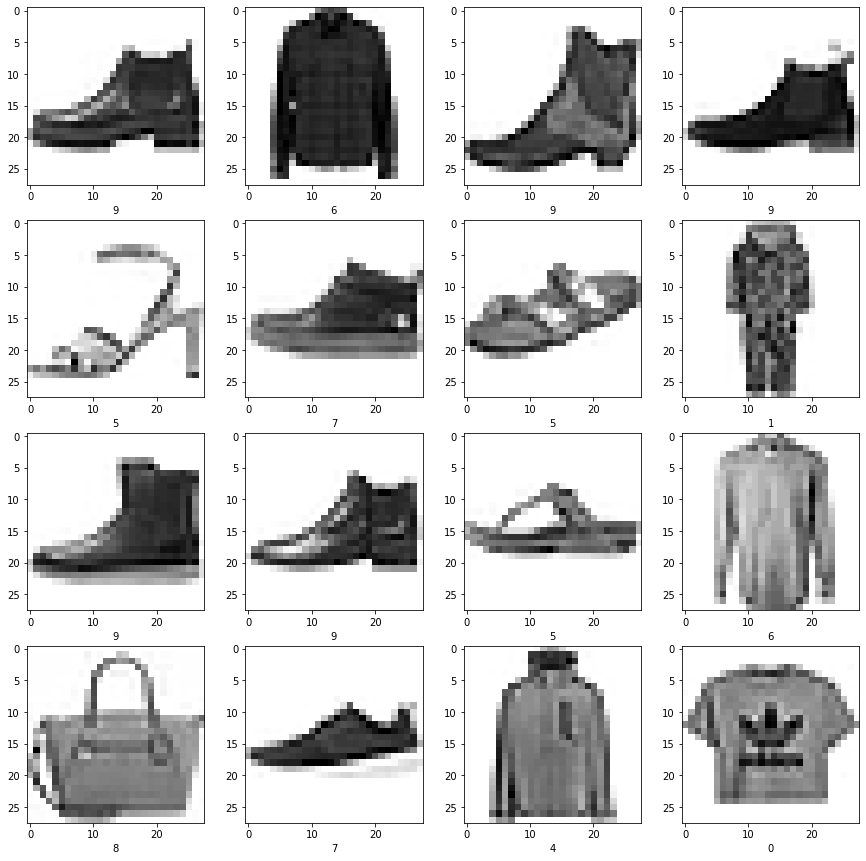

In [ ]:
#Checking for the confirmation of the train images data set
plt.figure(figsize=(15,15)) #Sizing them up
for i in range(len(sample_images)):
  plt.subplot(4,4,i+1) #Displaying them in a 4x4 format
  plt.imshow(train_images[sample_images[i]], cmap=plt.cm.binary) #Displaying our images
  plt.xlabel(train_labels[sample_images[i]]) #Displaying the labels
plt.show()# Show in rows

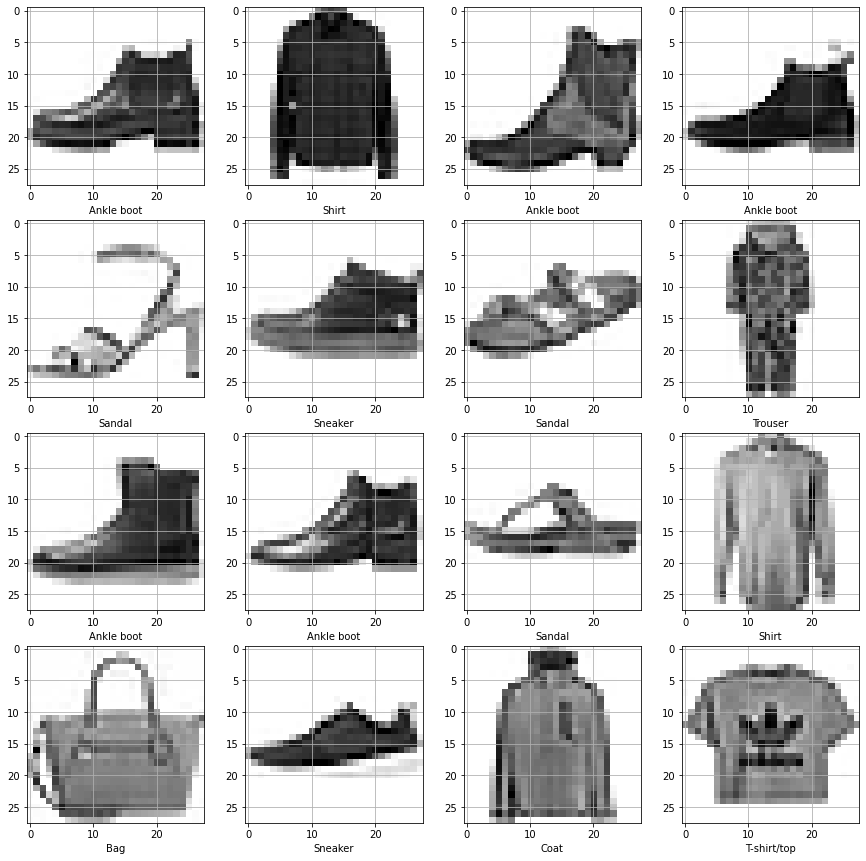

In [ ]:
#Checking Label renaming for each individual image and confirming the labels were completed
plt.figure(figsize=(15,15))
for i in range(len(sample_images)):
  plt.subplot(4,4,i+1) #Displaying them in a 4x4 format
  plt.grid(True) #Need to visuallize the pixel seperation
  plt.imshow(train_images[sample_images[i]], cmap=plt.cm.binary)
  plt.xlabel(category_names[train_labels[sample_images[i]]])
plt.show()

In [ ]:
#Dividing by RGB 255
train_images = train_images / 255.0 
test_images = test_images / 255.0

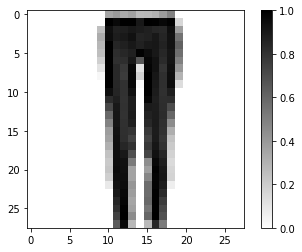

In [ ]:
#Confirming the color disparities of the fashion images
plt.figure()
plt.imshow(train_images[365], cmap = plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
#Creating a Keras Neural Network
model = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape = (28, 28)), #Starting with 784 nodes 28*28
      tf.keras.layers.Dense(686, activation = 'relu'), #Shrinking the image to 128 nodes activating default Rectified Linear Unit
      tf.keras.layers.Dense(588, activation = 'relu'), #Shrinking the image to 128 nodes activating default Rectified Linear Unit
      tf.keras.layers.Dense(490, activation = 'relu'), #Shrinking the image to 128 nodes activating default Rectified Linear Unit
      tf.keras.layers.Dense(392, activation = 'relu'), #Shrinking the image to 128 nodes activating default Rectified Linear Unit
      tf.keras.layers.Dense(294, activation = 'relu'), #Shrinking the image to 128 nodes activating default Rectified Linear Unit
      tf.keras.layers.Dense(196, activation = 'relu'), #Shrinking the image to 128 nodes activating default Rectified Linear Unit
      tf.keras.layers.Dense(98, activation = 'relu'), #Shrinking the image to 64 nodes activating default Rectified Linear Unit
      tf.keras.layers.Dense(10),                         
])

#Compiling and activating the Categorical and Displaying the Loss/Accuracy of our model
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

#Fit the training and testing images, repeating 20 times of batch size 64
model.fit(train_images, train_labels, epochs = 20, batch_size = 64)

Epoch 1/20
938/938 [==============================] - 21s 22ms/step - loss: 0.5376 - accuracy: 0.8042
Epoch 2/20
938/938 [==============================] - 20s 22ms/step - loss: 0.3941 - accuracy: 0.8587
Epoch 3/20
938/938 [==============================] - 21s 22ms/step - loss: 0.3493 - accuracy: 0.8744
Epoch 4/20
938/938 [==============================] - 21s 22ms/step - loss: 0.3234 - accuracy: 0.8838
Epoch 5/20
938/938 [==============================] - 21s 22ms/step - loss: 0.3085 - accuracy: 0.8880
Epoch 6/20
938/938 [==============================] - 20s 22ms/step - loss: 0.2937 - accuracy: 0.8940
Epoch 7/20
938/938 [==============================] - 21s 23ms/step - loss: 0.2818 - accuracy: 0.8979
Epoch 8/20
938/938 [==============================] - 20s 22ms/step - loss: 0.2680 - accuracy: 0.9012
Epoch 9/20
938/938 [==============================] - 21s 22ms/step - loss: 0.2590 - accuracy: 0.9057
Epoch 10/20
938/938 [==============================] - 21s 22ms/step - loss: 0.248

In [ ]:
#Same Model as above, we are shortening the amount of layers to play with. Expecting lower Accuracy to drop with less layer 
model2 = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape = (28, 28)), #Starting with 784 nodes 28*28
      tf.keras.layers.Dense(686, activation = 'relu'), #Shrinking the image to 128 nodes activating default Rectified Linear Unit
      tf.keras.layers.Dense(196, activation = 'relu'), #Shrinking the image to 128 nodes activating default Rectified Linear Unit
      tf.keras.layers.Dense(98, activation = 'relu'), #Shrinking the image to 64 nodes activating default Rectified Linear Unit
      tf.keras.layers.Dense(10),                         
])

model2.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

#train
model2.fit(test_images, test_labels, epochs = 10, batch_size = 64)

Epoch 1/10
157/157 [==============================] - 2s 11ms/step - loss: 0.7301 - accuracy: 0.7345
Epoch 2/10
157/157 [==============================] - 2s 11ms/step - loss: 0.5059 - accuracy: 0.8135
Epoch 3/10
157/157 [==============================] - 2s 10ms/step - loss: 0.4411 - accuracy: 0.8425
Epoch 4/10
157/157 [==============================] - 2s 10ms/step - loss: 0.4077 - accuracy: 0.8483
Epoch 5/10
157/157 [==============================] - 2s 10ms/step - loss: 0.3715 - accuracy: 0.8632
Epoch 6/10
157/157 [==============================] - 2s 10ms/step - loss: 0.3545 - accuracy: 0.8697
Epoch 7/10
157/157 [==============================] - 2s 10ms/step - loss: 0.3492 - accuracy: 0.8681
Epoch 8/10
157/157 [==============================] - 2s 10ms/step - loss: 0.3233 - accuracy: 0.8786
Epoch 9/10
157/157 [==============================] - 2s 10ms/step - loss: 0.2972 - accuracy: 0.8880
Epoch 10/10
157/157 [==============================] - 2s 10ms/step - loss: 0.2848 - accura

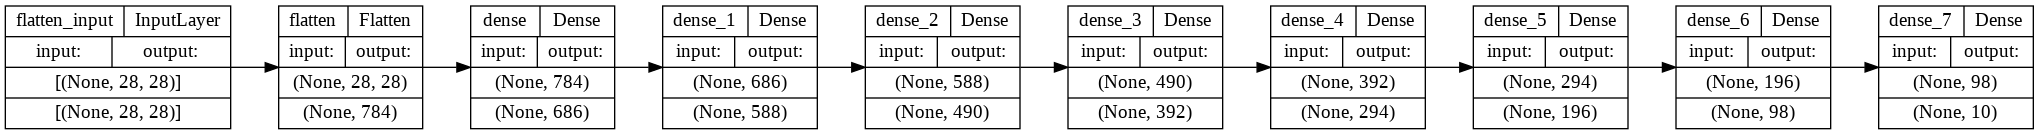

In [ ]:
#Displaying and plotting the layer
tf.keras.utils.plot_model(model, show_shapes = True, rankdir = "LR")

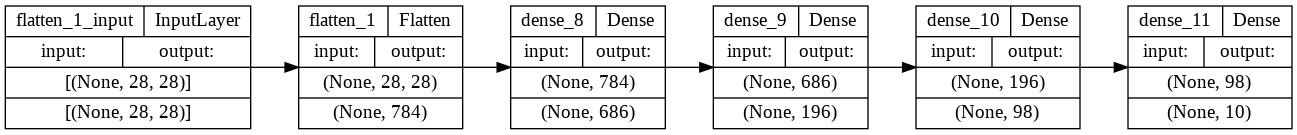

In [ ]:
#Testing the initial model for accuracy
tf.keras.utils.plot_model(model2, show_shapes = True, rankdir = "LR")

# Naive Bayes Algorithm - Gaussian

Naive Bayes is a machine learning method that is used to predict the likelihood that an even will occur given evidence that's present in the the data. It assumes all of the predictors are independent of one another. Used for multiclass classification

3 types of NAive Bayes Models:

Multimnomial - good for when you features are categorial or continuous and describe discrete frequency counts

Bernoulli - good for making predictions from binary features

** Gaussian - for making predictions from normally distributed distributed features. (Best used for Images)

In [ ]:
#Reshaping the test and train set. 784 Pixel for the 28 by 28 picture
train_images = train_images.reshape(60000, 784)
test_images = test_images.reshape(10000, 784)

In [ ]:
#Seeing an array of the pixels per picture
test_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

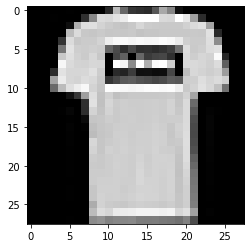

In [ ]:
#Seeing the images in a 28 x 28 format in gray color
plt.imshow(train_images[1].reshape((28,28)), cmap = 'gray')

In [ ]:
#Using the Gaussain NB Set for images
GNB_model = GaussianNB() 
fit_nb = GNB_model.fit(train_images, train_labels)
print(fit_nb)

prediction = fit_nb.predict(test_images)

print(prediction)

GaussianNB()
[7 4 1 ... 3 1 7]


In [ ]:
#creating the Confusion Matrix for our test labels 
con_matrix = confusion_matrix(test_labels, prediction)
print(con_matrix)

[[586  64  29 162 110   0  20   0  29   0]
 [  1 939  14  36   7   0   1   0   2   0]
 [  7  14 324  65 545   0  23   0  22   0]
 [  9 387   6 545  43   0   4   0   6   0]
 [  0  34  44 131 779   0   4   0   8   0]
 [  0   0   1   1   0 278   3 660   5  52]
 [117  34 112 200 435   0  40   0  62   0]
 [  0   0   0   0   0   3   0 988   0   9]
 [  0   2  19  85 149   3  27   4 710   1]
 [  0   0   1   1   0  16   3 304   8 667]]


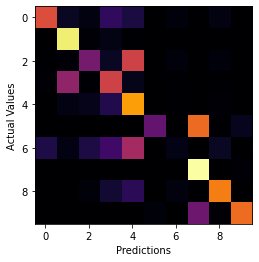

In [ ]:
#Creating a visualization of the confusion matrix 
plt.imshow(con_matrix, cmap = 'inferno', interpolation = 'nearest')

plt.xlabel('Predictions')

plt.ylabel('Actual Values')

plt.show()

In [ ]:
#Creating a function that sums the accuracy
def sum(con_matrix):
  sum = 0
  for i in range(10):
    for j in range(10):
      if i == j: sum+= con_matrix[i,j]
  return sum

In [ ]:
#using the function the to get the accuracy. 
sum = sum(con_matrix)
print("Accuracy: ", sum/10000)

Accuracy:  0.5856
